# School clasterization

## Считывание и очистка

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import scipy.stats as sps
import seaborn as sns

In [2]:
def toi(x):
    return np.nan if pd.isna(x) else int(x)

In [3]:
def unique_name(s):
    if 'вторая школа' in s.lower():
        return 'Вторая школа'
    elif 'сунц мгу' in s.lower():
        return 'СУНЦ МГУ'
    elif 'лицей' in s.lower() and 'вшэ' in s.lower():
        return 'лицей ВШЭ'
    elif 'цпм' in s.lower() or 'центра педагогического мастерства' in s.lower():
        return 'ЦПМ'
    elif 'интеллектуал' in s.lower():
        return 'ГБОУ школа «Интеллектуал»'
    elif 'летово' in s.lower():
        return 'школа Летово'
    elif 'максимчука' in s.lower():
        return s
    elif 'вернадского' in s.lower():
        return 'школа на проспекте Вернадского'
    elif 'троицка»' in s.lower():
        return 'МАОУ «Гимназия г.Троицка»'
    elif s == 'университетская гимназия':
        return 'университетская гимназия (школа-интернат) МГУ имени М.В.Ломоносова'
    elif 'марьина роща' in s.lower():
        return 'ГБОУ школа Марьина Роща имени В.Ф. Орлова'
    elif 'первый московский кадетский корпус' in s.lower() or 'пмкк' in s.lower():
        return 'ГБОУ «Первый Московский кадетский корпус»'
    elif 'государственная столичная гимназия' in s.lower() or 'гсг' in s.lower():
        return 'ГБОУ Государственная столичная гимназия'
    elif 'итш' in s.lower() or 'инженерно-техническая школа' in s.lower():
        return 'ГБОУ Инженерно-техническая школа'
    elif 'пансион воспитанниц' in s.lower() or 'пв' in s.lower():
        return 'Пансион воспитанниц МО РФ'
    else: 
        for word in s.replace('»', '').split():
            if word.isdigit():
                return word
    return s

In [4]:
def profile_correction(x):
    if x == 'астрономия':
        return 'Астрономия'
    elif x == 'Информатика и информационно-коммуникационные технологии (ИКТ) и ИКТ' or x == 'Информатика и информационно-коммуникационные технологии (ИКТ)':
        return 'Информатика'
    elif x == 'Немецкий язык':
        return 'Иностранный язык (немецкий язык)' 
    elif x == 'филология':
        return 'Филология'
    elif x == 'История искусств' or x == 'Мировая художественная культура (МХК)' or x == 'Искусство (МХК)':
        return 'МХК'
    else:
        return x

In [5]:
olymp = pd.read_csv('olymp.csv', sep=';', header=0)

olymp = olymp.drop(columns=['IDEKIS', 'ID', 'Unnamed: 12', 'global_id']).drop([0]).reset_index(drop=True)

C:\Users\i9629\AppData\Local\Temp\ipykernel_16648\1515750694.py:1: DtypeWarning: Columns (0,1,5,6,11) have mixed types. Specify dtype option on import or set low_memory=False.
  olymp = pd.read_csv('olymp.csv', sep=';', header=0)


In [6]:
olymp['UniqueName'] = olymp['ShortName'].apply(lambda s: unique_name(s))
olymp['Stage'] = olymp['Stage'].apply(lambda x: toi(x))
olymp['Class'] = olymp['Class'].apply(lambda x: toi(x))
olymp['OlympiadProfile'] = olymp['OlympiadProfile'].apply(lambda x: profile_correction(x))


olymp.head()

,FullName,ShortName,OlympiadType,Stage,Class,OlympiadName,OlympiadProfile,Status,Year,UniqueName
0,Государственное бюджетное общеобразовательное ...,ГБОУ лицей «Вторая школа»,Всероссийская олимпиада,3.0,11,Всероссийская олимпиада школьников по английск...,Иностранный язык (английский язык),призёр,2012/2013,Вторая школа
1,Государственное бюджетное общеобразовательное ...,ГБОУ лицей «Вторая школа»,Всероссийская олимпиада,3.0,11,Всероссийская олимпиада школьников по английск...,Иностранный язык (английский язык),призёр,2012/2013,Вторая школа
2,Государственное бюджетное общеобразовательное ...,ГБОУ лицей «Вторая школа»,Всероссийская олимпиада,3.0,10,Всероссийская олимпиада школьников по английск...,Иностранный язык (английский язык),призёр,2012/2013,Вторая школа
3,Государственное бюджетное образовательное учре...,ГБОУ СОШ № 26,Всероссийская олимпиада,4.0,11,Всероссийская олимпиада школьников по английск...,Иностранный язык (английский язык),победитель,2012/2013,26
4,Государственное бюджетное образовательное учре...,ГБОУ СОШ № 26,Всероссийская олимпиада,3.0,11,Всероссийская олимпиада школьников по английск...,Иностранный язык (английский язык),призёр,2012/2013,26


In [7]:
olymp['OlympiadType'].unique()

array(['Всероссийская олимпиада', 'Московская олимпиада'], dtype=object)

In [8]:
olymp['Stage'].unique()

array([ 3.,  4., nan])

(array([71452.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  9271.]),
 array([3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. ]),
 <BarContainer object of 10 artists>)

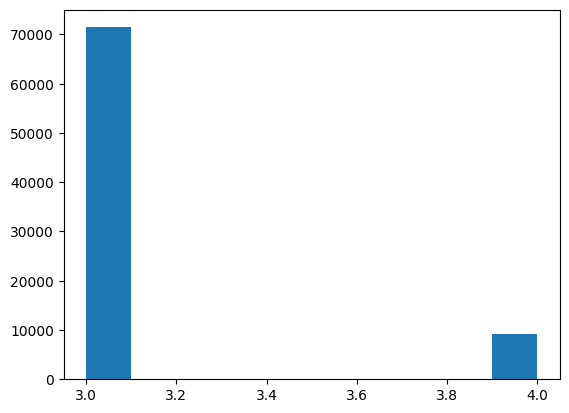

In [9]:
pl.hist(olymp['Stage'])

In [10]:
pd.pivot_table(olymp, index=['OlympiadType', 'Stage'], columns='Year', values='Status', aggfunc=len, dropna=False)

Year                           2012/2013  2013/2014  2014/2015  2015/2016  \
OlympiadType            Stage                                               
Всероссийская олимпиада 3.0       2759.0     3570.0     5147.0     5962.0   
                        4.0        321.0      368.0      583.0      698.0   
                        NaN          NaN        NaN        NaN        NaN   
Московская олимпиада    3.0          NaN        NaN        NaN        NaN   
                        4.0          NaN        NaN        NaN        NaN   
                        NaN       2317.0     2931.0     3190.0     3292.0   

Year                           2016/2017  2017/2018  2018/2019  2019/2020  \
OlympiadType            Stage                                               
Всероссийская олимпиада 3.0       6150.0     6345.0     7140.0     7432.0   
                        4.0        815.0      903.0      943.0      598.0   
                        NaN          NaN        NaN        NaN        NaN   
Московская олимпиада    3.0          NaN        NaN        NaN        NaN   
                        4.0          NaN        NaN        NaN        NaN   
                        NaN       3520.0     3988.0     5182.0        NaN   

Year                           2020/2021  2021/2022  2022/2023  
OlympiadType            Stage                                   
Всероссийская олимпиада 3.0       8763.0     8983.0     9201.0  
                        4.0       1340.0     1314.0     1388.0  
                        NaN          NaN        NaN        NaN  
Московская олимпиада    3.0          NaN        NaN        NaN  
                        4.0          NaN        NaN        NaN  
                        NaN       4821.0     5419.0     5540.0

In [11]:
olymp['Class'].unique()

array([11, 10,  9,  7,  8,  6,  5,  4,  2,  3,  1, 12], dtype=int64)

(array([1.3900e+02, 1.3200e+02, 0.0000e+00, 2.2100e+02, 0.0000e+00,
        3.7900e+02, 0.0000e+00, 4.2120e+03, 0.0000e+00, 5.9370e+03,
        6.1600e+03, 0.0000e+00, 8.0530e+03, 0.0000e+00, 2.7773e+04,
        0.0000e+00, 3.1155e+04, 0.0000e+00, 3.6735e+04, 2.7000e+01]),
 array([ 1.  ,  1.55,  2.1 ,  2.65,  3.2 ,  3.75,  4.3 ,  4.85,  5.4 ,
         5.95,  6.5 ,  7.05,  7.6 ,  8.15,  8.7 ,  9.25,  9.8 , 10.35,
        10.9 , 11.45, 12.  ]),
 <BarContainer object of 20 artists>)

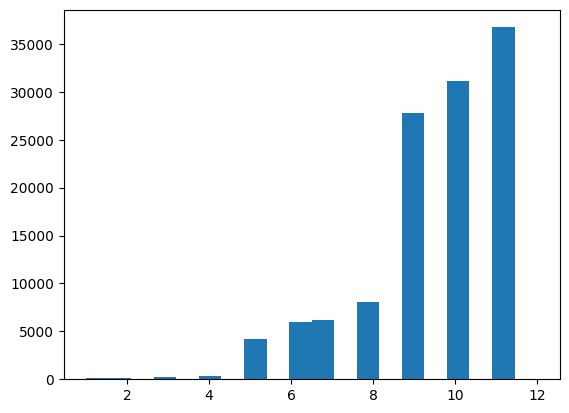

In [12]:
pl.hist(olymp['Class'], bins=20)

In [13]:
# pd.pivot_table(olymp[(olymp['OlympiadType'] == 'Всероссийская олимпиада') & (olymp['Stage'] == 3)], 
#                index=['OlympiadProfile'], columns='Year', values='Status', aggfunc=len, dropna=False)

In [14]:
# olymp[(olymp['Year'] == '2022/2023') & 
#       (olymp['OlympiadType'] == 'Всероссийская олимпиада') & 
#       (olymp['OlympiadProfile'] == 'Русский язык') & 
#       (olymp['Stage'] == 4)]\
# .sort_values('Class').tail(34)

In [15]:
rpo_4 = olymp[(olymp['OlympiadType'] == 'Всероссийская олимпиада') & (olymp['Stage'] == 4)] 
# rpo_4

In [16]:
def rmse(x:pd.Series, y:pd.Series) -> int:
    return np.sqrt(((x - y)**2).mean())

## Кластеризация

### Ditribution analysis

In [17]:
def count_win(x):
    return len(x[x == 'победитель'])

def count_prize(x):
    return len(x[x == 'призёр'])

In [18]:
rpo_4['OlympiadProfile'].unique()

array(['Иностранный язык (английский язык)', 'Астрономия', 'Биология',
       'География', 'Информатика', 'История', 'Литература', 'Математика',
       'МХК', 'Иностранный язык (немецкий язык)',
       'Основы безопасности жизнедеятельности', 'Обществознание', 'Право',
       'Русский язык', 'Технология', 'Физика', 'Физическая культура',
       'Иностранный язык (французский язык)', 'Химия', 'Экология',
       'Экономика', 'Иностранный язык (испанский язык)',
       'Иностранный язык (итальянский язык)',
       'Иностранный язык (китайский язык)'], dtype=object)

In [19]:
# rpo4_grouped = rpo_4[rpo_4['OlympiadProfile'] == 'Обществознание'].groupby(['Year', 'UniqueName']).agg({'Status': [count_win, count_prize]})
rpo4_grouped = rpo_4.groupby(['Year', 'UniqueName']).agg({'Status': [count_win, count_prize]})

rpo4_grouped.columns = ['Win', 'Prize']
rpo4_grouped['WinPrize'] = rpo4_grouped['Win'] + rpo4_grouped['Prize']
rpo4_grouped['WWinPrize'] = 2 * rpo4_grouped['Win'] + rpo4_grouped['Prize']


rpo4_grouped

Win  Prize  \
Year      UniqueName                                                       
2012/2013 1000                                                  1      0   
          1043                                                  0      1   
          109                                                   0      1   
          1120                                                  0      1   
          1158                                                  1      0   
...                                                           ...    ...   
2022/2023 университетская гимназия (школа-интернат) МГУ и...    4      9   
          школа «Знайка»                                        0      1   
          школа «Новое образование»                             0      1   
          школа Летово                                         12     49   
          школа на проспекте Вернадского                        0      3   

                                                              WinPrize  \
Year      UniqueName                                                     
2012/2013 1000                                                       1   
          1043                                                       1   
          109                                                        1   
          1120                                                       1   
          1158                                                       1   
...                                                                ...   
2022/2023 университетская гимназия (школа-интернат) МГУ и...        13   
          школа «Знайка»                                             1   
          школа «Новое образование»                                  1   
          школа Летово                                              61   
          школа на проспекте Вернадского                             3   

                                                              WWinPrize  
Year      UniqueName                                                     
2012/2013 1000                                                        2  
          1043                                                        1  
          109                                                         1  
          1120                                                        1  
          1158                                                        2  
...                                                                 ...  
2022/2023 университетская гимназия (школа-интернат) МГУ и...         17  
          школа «Знайка»                                              1  
          школа «Новое образование»                                   1  
          школа Летово                                               73  
          школа на проспекте Вернадского                              3  

[2175 rows x 4 columns]

In [20]:
rpo4_grouped.index.get_level_values(0).unique()

Index(['2012/2013', '2013/2014', '2014/2015', '2015/2016', '2016/2017',
       '2017/2018', '2018/2019', '2019/2020', '2020/2021', '2021/2022',
       '2022/2023'],
      dtype='object', name='Year')

--------------------------------  2012/2013  -------------------------------
              Win       Prize    WinPrize   WWinPrize
count  127.000000  127.000000  127.000000  127.000000
mean     0.661417    1.866142    2.527559    3.188976
std      1.222932    2.628785    3.410597    4.398290
min      0.000000    0.000000    1.000000    1.000000
25%      0.000000    1.000000    1.000000    1.000000
50%      0.000000    1.000000    1.000000    2.000000
75%      1.000000    2.000000    2.000000    3.000000
max      8.000000   15.000000   23.000000   31.000000


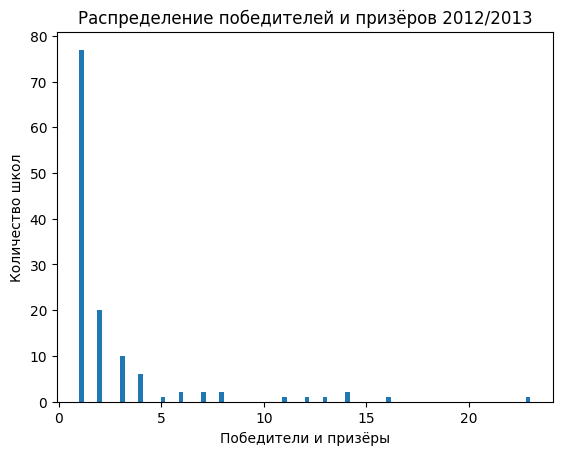

--------------------------------  2013/2014  -------------------------------
              Win       Prize    WinPrize   WWinPrize
count  143.000000  143.000000  143.000000  143.000000
mean     0.860140    1.713287    2.573427    3.433566
std      1.456416    2.407799    3.452881    4.721183
min      0.000000    0.000000    1.000000    1.000000
25%      0.000000    1.000000    1.000000    1.000000
50%      0.000000    1.000000    1.000000    2.000000
75%      1.000000    2.000000    2.000000    3.000000
max      9.000000   17.000000   19.000000   25.000000


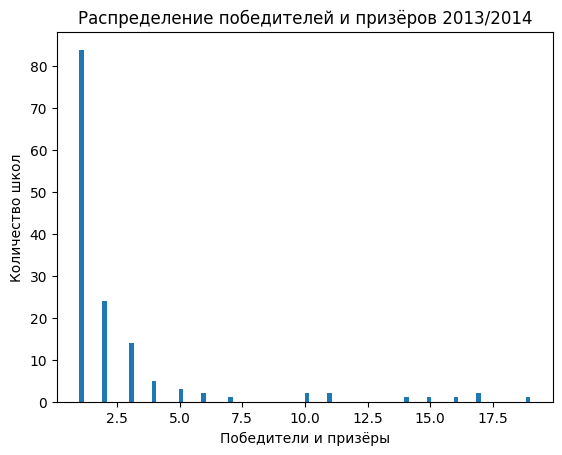

--------------------------------  2014/2015  -------------------------------
              Win       Prize    WinPrize   WWinPrize
count  181.000000  181.000000  181.000000  181.000000
mean     0.685083    2.535912    3.220994    3.906077
std      1.306075    3.840585    4.906436    6.066943
min      0.000000    0.000000    1.000000    1.000000
25%      0.000000    1.000000    1.000000    1.000000
50%      0.000000    1.000000    1.000000    2.000000
75%      1.000000    2.000000    3.000000    4.000000
max      8.000000   30.000000   37.000000   44.000000


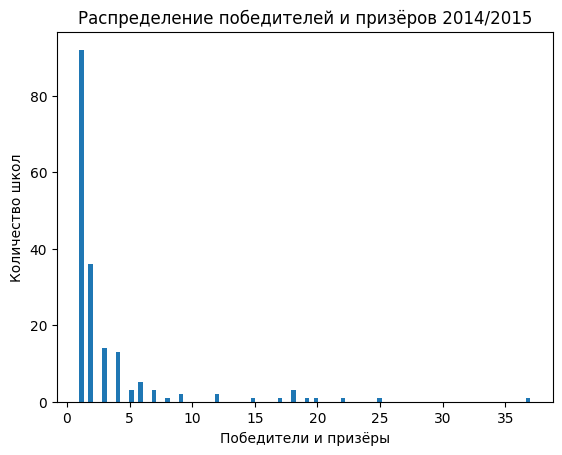

--------------------------------  2015/2016  -------------------------------
              Win       Prize    WinPrize   WWinPrize
count  213.000000  213.000000  213.000000  213.000000
mean     0.676056    2.600939    3.276995    3.953052
std      1.418623    4.726022    5.891574    7.149195
min      0.000000    0.000000    1.000000    1.000000
25%      0.000000    1.000000    1.000000    1.000000
50%      0.000000    1.000000    1.000000    2.000000
75%      1.000000    2.000000    3.000000    3.000000
max      8.000000   34.000000   42.000000   50.000000


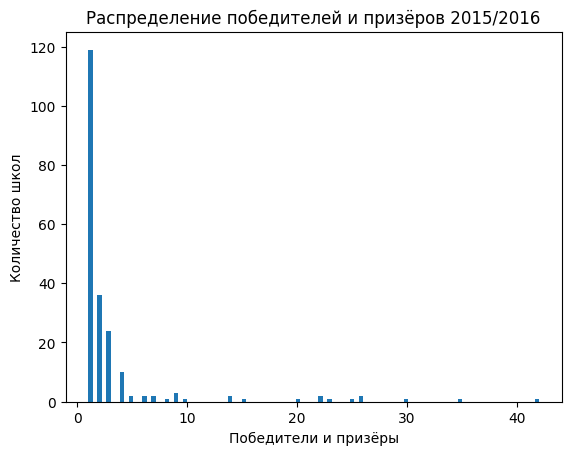

--------------------------------  2016/2017  -------------------------------
              Win       Prize    WinPrize   WWinPrize
count  219.000000  219.000000  219.000000  219.000000
mean     0.757991    2.963470    3.721461    4.479452
std      1.755951    5.822965    7.327217    8.923903
min      0.000000    0.000000    1.000000    1.000000
25%      0.000000    1.000000    1.000000    1.000000
50%      0.000000    1.000000    1.000000    2.000000
75%      1.000000    2.000000    3.000000    3.500000
max     11.000000   49.000000   60.000000   71.000000


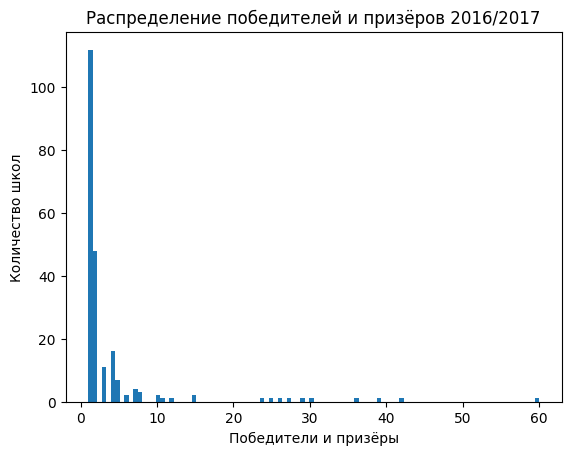

--------------------------------  2017/2018  -------------------------------
              Win       Prize    WinPrize   WWinPrize
count  223.000000  223.000000  223.000000  223.000000
mean     0.852018    3.197309    4.049327    4.901345
std      1.711272    5.844578    7.299407    8.846496
min      0.000000    0.000000    1.000000    1.000000
25%      0.000000    1.000000    1.000000    1.000000
50%      0.000000    1.000000    2.000000    2.000000
75%      1.000000    3.000000    3.000000    4.000000
max      9.000000   40.000000   47.000000   54.000000


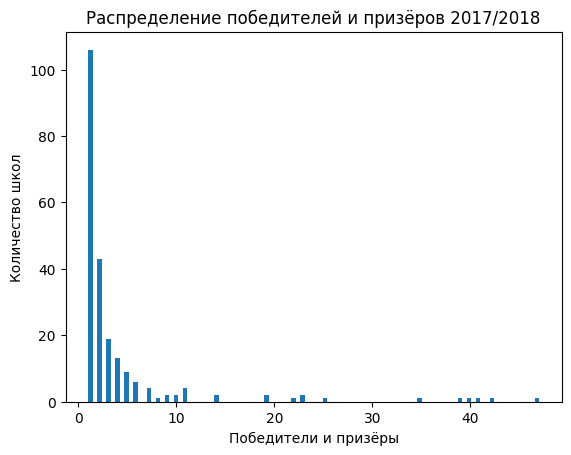

--------------------------------  2018/2019  -------------------------------
              Win       Prize    WinPrize   WWinPrize
count  225.000000  225.000000  225.000000  225.000000
mean     0.902222    3.288889    4.191111    5.093333
std      1.863475    6.074766    7.667994    9.361547
min      0.000000    0.000000    1.000000    1.000000
25%      0.000000    1.000000    1.000000    1.000000
50%      0.000000    1.000000    2.000000    2.000000
75%      1.000000    3.000000    3.000000    4.000000
max     12.000000   47.000000   58.000000   69.000000


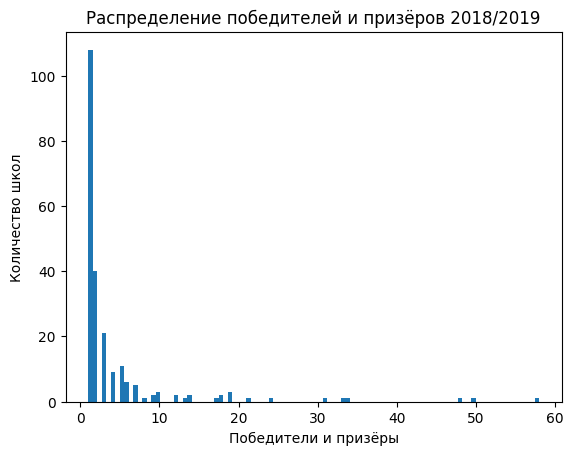

--------------------------------  2019/2020  -------------------------------
         Win       Prize    WinPrize   WWinPrize
count  165.0  165.000000  165.000000  165.000000
mean     0.0    3.624242    3.624242    3.624242
std      0.0    6.700338    6.700338    6.700338
min      0.0    1.000000    1.000000    1.000000
25%      0.0    1.000000    1.000000    1.000000
50%      0.0    1.000000    1.000000    1.000000
75%      0.0    3.000000    3.000000    3.000000
max      0.0   55.000000   55.000000   55.000000


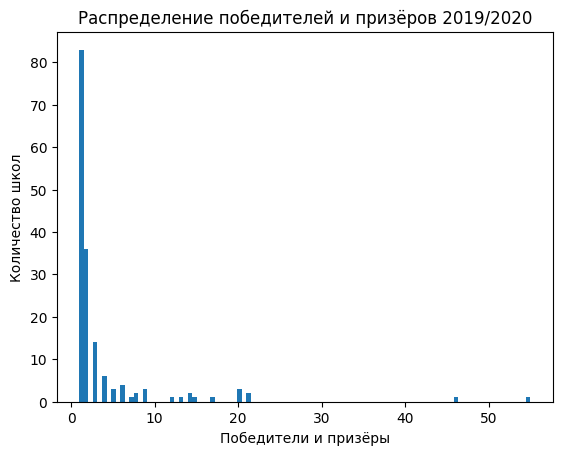

--------------------------------  2020/2021  -------------------------------
              Win      Prize    WinPrize   WWinPrize
count  238.000000  238.00000  238.000000  238.000000
mean     1.105042    4.52521    5.630252    6.735294
std      3.030349   10.51889   13.390195   16.319118
min      0.000000    0.00000    1.000000    1.000000
25%      0.000000    1.00000    1.000000    1.000000
50%      0.000000    1.00000    1.000000    2.000000
75%      1.000000    3.00000    4.000000    5.000000
max     29.000000   99.00000  128.000000  157.000000


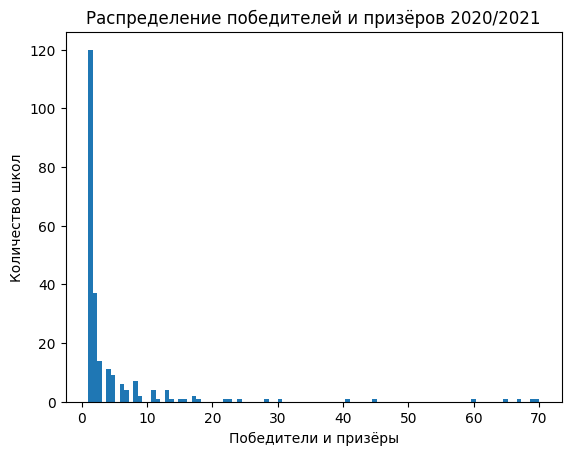

--------------------------------  2021/2022  -------------------------------
              Win       Prize    WinPrize   WWinPrize
count  226.000000  226.000000  226.000000  226.000000
mean     1.097345    4.716814    5.814159    6.911504
std      3.811012   13.071407   16.758175   20.490456
min      0.000000    0.000000    1.000000    1.000000
25%      0.000000    1.000000    1.000000    1.000000
50%      0.000000    1.000000    2.000000    2.000000
75%      1.000000    3.000000    4.000000    5.000000
max     48.000000  160.000000  208.000000  256.000000


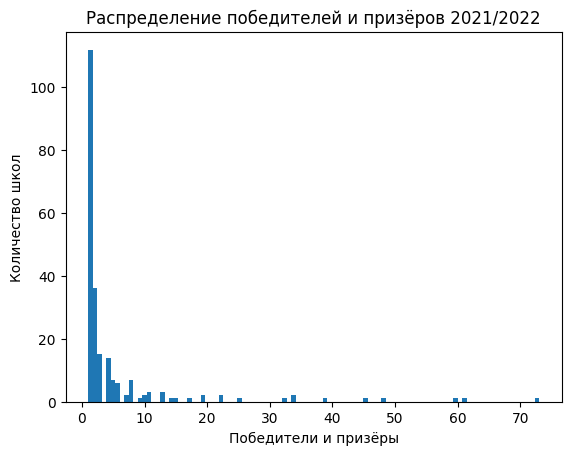

--------------------------------  2022/2023  -------------------------------
             Win       Prize    WinPrize   WWinPrize
count  215.00000  215.000000  215.000000  215.000000
mean     1.27907    5.176744    6.455814    7.734884
std      4.94231   17.974968   22.831497   27.718367
min      0.00000    0.000000    1.000000    1.000000
25%      0.00000    1.000000    1.000000    1.000000
50%      0.00000    1.000000    2.000000    2.000000
75%      1.00000    3.000000    4.000000    4.500000
max     66.00000  237.000000  303.000000  369.000000


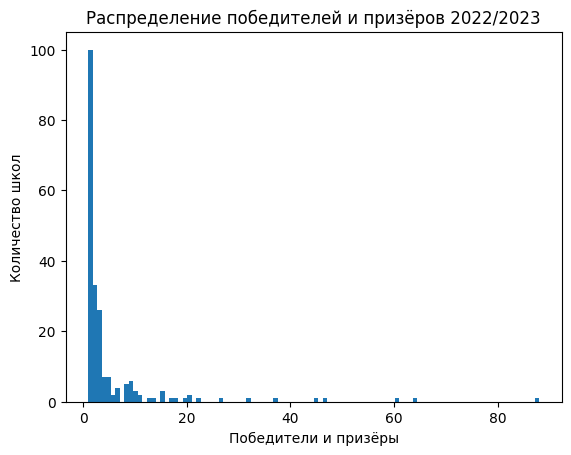

In [21]:
for year in rpo4_grouped.index.get_level_values(0).unique():
    print(f'--------------------------------  {year}  -------------------------------')
    print(rpo4_grouped.loc[year].describe())
    df = rpo4_grouped[rpo4_grouped['WinPrize'] < 100]
    pl.hist(df.loc[year]['WinPrize'], bins = 100)
    pl.title(f'Распределение победителей и призёров {year}')
    pl.xlabel('Победители и призёры')
    pl.ylabel('Количество школ')
    pl.show()

In [22]:
rpo_4.groupby('Year')['Status'].size()

Year
2012/2013     321
2013/2014     368
2014/2015     583
2015/2016     698
2016/2017     815
2017/2018     903
2018/2019     943
2019/2020     598
2020/2021    1340
2021/2022    1314
2022/2023    1388
Name: Status, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, '2012/2013'),
  Text(1, 0, '2013/2014'),
  Text(2, 0, '2014/2015'),
  Text(3, 0, '2015/2016'),
  Text(4, 0, '2016/2017'),
  Text(5, 0, '2017/2018'),
  Text(6, 0, '2018/2019'),
  Text(7, 0, '2019/2020'),
  Text(8, 0, '2020/2021'),
  Text(9, 0, '2021/2022'),
  Text(10, 0, '2022/2023')])

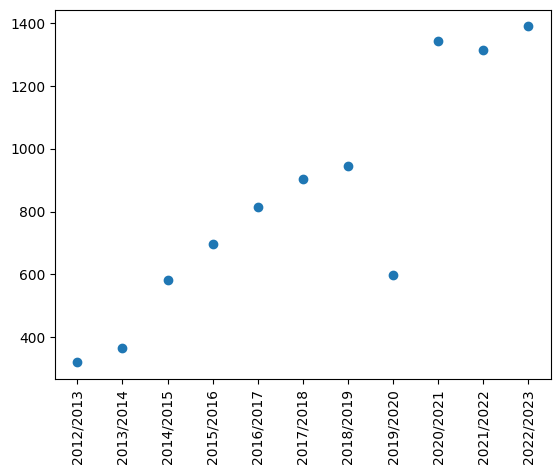

In [23]:
pl.plot(rpo_4.groupby('Year')['Status'].size(), 'o')
pl.xticks(rotation=90)

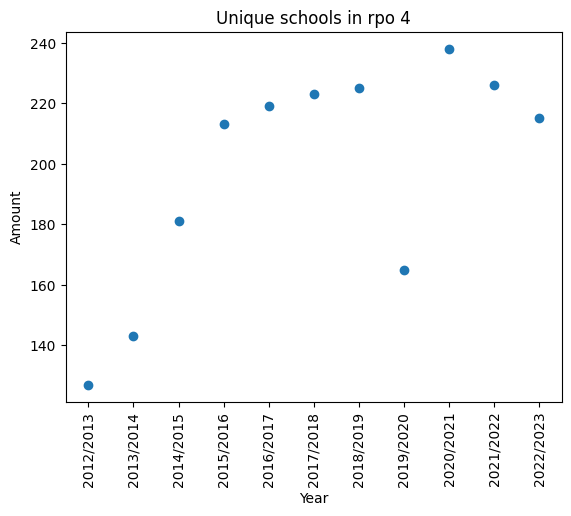

In [24]:
pl.plot(rpo_4.groupby('Year')['UniqueName'].nunique(), 'o')
pl.title('Unique schools in rpo 4')
pl.xlabel('Year')
pl.ylabel('Amount')
pl.xticks(rotation=90)
pl.show()

### Quantile search

In [25]:
# rpo_4 = 

In [26]:
def get_percentile_levels_by_deviding_array_into_groups_with_equal_values_sum(x, n_groups):
    percentile_values = [x.sum()*(i+1)/groups for i in range(groups-1)]
    percentile_levels = sps.percentileofscore(x.sort_values().cumsum(), percentile_values).round(2)
    return percentile_levels


In [27]:
groups = 5

rpo4_grouped.groupby('Year')['WinPrize'].apply(lambda x: get_percentile_levels_by_deviding_array_into_groups_with_equal_values_sum(x, n_groups=groups))

Year
2012/2013    [50.39, 78.74, 91.34, 96.85]
2013/2014     [51.05, 79.02, 91.61, 96.5]
2014/2015    [57.46, 81.77, 92.82, 97.24]
2015/2016    [60.56, 85.92, 94.84, 97.65]
2016/2017    [62.56, 87.21, 95.43, 98.17]
2017/2018     [64.13, 86.1, 94.62, 97.76]
2018/2019    [65.78, 86.22, 94.22, 98.22]
2019/2020    [61.21, 86.06, 93.94, 98.18]
2020/2021    [75.21, 90.76, 96.64, 98.32]
2021/2022     [75.66, 91.59, 96.9, 99.12]
2022/2023    [77.67, 92.56, 97.67, 99.53]
Name: WinPrize, dtype: object

In [28]:
quantiles_origin = rpo4_grouped.groupby('Year')['WinPrize'].apply(lambda x: get_percentile_levels_by_deviding_array_into_groups_with_equal_values_sum(x, n_groups=groups)).mean()
quantiles_origin

array([63.78909091, 85.99545455, 94.54818182, 97.95818182])

In [29]:
quantiles = [0, .7, .85, .95, .99, 1]


# quantiles =[0]
# quantiles.extend(quantiles_origin/100)
# quantiles.append(1)
# quantiles = np.array(quantiles).round(4)
# quantiles

In [30]:
def quant_sum(x, quantiles):
    res_quant_sum = np.array([])
    for quant in quantiles:
        res_quant_sum = np.append(res_quant_sum, x[x < np.quantile(x, quant)].sum())

    return np.diff(res_quant_sum)

In [31]:
def quant_sum_err(x, quantiles):
    res_quant_sum = np.array([])
    for quant in quantiles:
        res_quant_sum = np.append(res_quant_sum, x[x < np.quantile(x, quant)].sum())
    res_quant_sum = np.diff(res_quant_sum)

    return rmse(res_quant_sum, [res_quant_sum.mean()] * len(res_quant_sum))

In [32]:
def quant_boarders(x, quantiles):
    res_quant_sum = np.array([])
    for quant in quantiles:
        res_quant_sum = np.append(res_quant_sum, np.quantile(x, quant))

    return res_quant_sum.round(2)

In [33]:
rpo4_grouped.groupby('Year')['WinPrize'].apply(lambda x: quant_sum(x, quantiles))

Year
2012/2013         [77.0, 70.0, 71.0, 64.0, 16.0]
2013/2014        [84.0, 48.0, 116.0, 67.0, 34.0]
2014/2015      [92.0, 114.0, 168.0, 147.0, 25.0]
2015/2016     [119.0, 144.0, 149.0, 179.0, 65.0]
2016/2017     [112.0, 129.0, 206.0, 227.0, 81.0]
2017/2018     [192.0, 109.0, 227.0, 245.0, 83.0]
2018/2019     [188.0, 154.0, 209.0, 236.0, 98.0]
2019/2020      [83.0, 138.0, 142.0, 134.0, 46.0]
2020/2021    [194.0, 195.0, 301.0, 383.0, 139.0]
2021/2022    [184.0, 186.0, 241.0, 361.0, 134.0]
2022/2023    [166.0, 181.0, 273.0, 313.0, 152.0]
Name: WinPrize, dtype: object

In [34]:
rpo4_grouped.groupby('Year')['WinPrize'].apply(lambda x: quant_sum_err(x, quantiles))

Year
2012/2013    22.186482
2013/2014    28.638436
2014/2015    49.587902
2015/2016    38.201571
2016/2017    56.046409
2017/2018    64.250759
2018/2019    47.740968
2019/2020    37.945224
2020/2021    87.730496
2021/2022    77.669556
2022/2023    63.990624
Name: WinPrize, dtype: float64

In [35]:
rpo4_grouped.groupby('Year')['WinPrize'].apply(lambda x: quant_boarders(x, quantiles))

Year
2012/2013      [1.0, 2.0, 4.0, 10.1, 15.48, 23.0]
2013/2014       [1.0, 2.0, 3.0, 10.9, 17.0, 19.0]
2014/2015       [1.0, 2.0, 4.0, 15.0, 22.6, 37.0]
2015/2016      [1.0, 2.0, 4.0, 14.4, 29.52, 42.0]
2016/2017      [1.0, 2.0, 4.0, 15.0, 38.46, 60.0]
2017/2018      [1.0, 3.0, 5.0, 18.5, 40.78, 47.0]
2018/2019      [1.0, 3.0, 6.0, 18.0, 44.64, 58.0]
2019/2020       [1.0, 2.0, 5.0, 14.8, 30.0, 55.0]
2020/2021    [1.0, 3.0, 8.0, 22.15, 68.26, 128.0]
2021/2022    [1.0, 3.0, 7.25, 22.0, 60.75, 208.0]
2022/2023     [1.0, 3.0, 8.0, 21.0, 63.58, 303.0]
Name: WinPrize, dtype: object

In [36]:
# rpo4_grouped = rpo4_grouped.drop('2012/2013', level='Year')
# rpo4_grouped['Level'] = rpo4_grouped.groupby('Year')['WinPrize'].apply(lambda x: pd.qcut(x, quantiles, labels=['low', 'mid', 'high'])).droplevel(0)
# rpo4_grouped
# rpo4_grouped

In [37]:
rpo4_grouped['Level'] = rpo4_grouped.groupby('Year')['WinPrize'].apply(lambda x: pd.qcut(x, quantiles, labels=['low', 'base', 'mid', 'high', 'out'])).droplevel(0)
rpo4_grouped

Win  Prize  \
Year      UniqueName                                                       
2012/2013 1000                                                  1      0   
          1043                                                  0      1   
          109                                                   0      1   
          1120                                                  0      1   
          1158                                                  1      0   
...                                                           ...    ...   
2022/2023 университетская гимназия (школа-интернат) МГУ и...    4      9   
          школа «Знайка»                                        0      1   
          школа «Новое образование»                             0      1   
          школа Летово                                         12     49   
          школа на проспекте Вернадского                        0      3   

                                                              WinPrize  \
Year      UniqueName                                                     
2012/2013 1000                                                       1   
          1043                                                       1   
          109                                                        1   
          1120                                                       1   
          1158                                                       1   
...                                                                ...   
2022/2023 университетская гимназия (школа-интернат) МГУ и...        13   
          школа «Знайка»                                             1   
          школа «Новое образование»                                  1   
          школа Летово                                              61   
          школа на проспекте Вернадского                             3   

                                                              WWinPrize Level  
Year      UniqueName                                                           
2012/2013 1000                                                        2   low  
          1043                                                        1   low  
          109                                                         1   low  
          1120                                                        1   low  
          1158                                                        2   low  
...                                                                 ...   ...  
2022/2023 университетская гимназия (школа-интернат) МГУ и...         17   mid  
          школа «Знайка»                                              1   low  
          школа «Новое образование»                                   1   low  
          школа Летово                                               73  high  
          школа на проспекте Вернадского                              3   low  

[2175 rows x 5 columns]

In [38]:
rpo4_grouped.groupby('UniqueName')['Level'].agg(list).tail(10)

UniqueName
Экономический лицей ФГБОУ ВО «РЭУ им. Г.В. Плеханова»                                                             [low]
лицей Академии при Президенте Российской Федерации                                                                [low]
лицей ВШЭ                                                             [base, high, out, out, high, out, out, out, hi...
лицей Финансового университета                                                                       [high, high, high]
университетская гимназия (школа-интернат) МГУ имени М.В.Ломоносова                          [high, high, mid, mid, mid]
центр образования «Знак»                                                                                          [low]
школа «Знайка»                                                                                                    [low]
школа «Новое образование»                                                                                         [low]
школа Летово                 

In [39]:
temp = rpo4_grouped.reset_index()
temp[temp['UniqueName'] == '1517']

,Year,UniqueName,Win,Prize,WinPrize,WWinPrize,Level
176,2013/2014,1517,1,0,1,2,low
330,2014/2015,1517,1,0,1,2,low
520,2015/2016,1517,0,1,1,1,low
960,2017/2018,1517,1,1,2,3,low
1178,2018/2019,1517,1,5,6,7,base
1380,2019/2020,1517,0,4,4,4,base
1569,2020/2021,1517,2,3,5,7,base
1805,2021/2022,1517,0,3,3,3,low
2025,2022/2023,1517,1,2,3,4,low


In [40]:
temp[temp['UniqueName'] == '57']

,Year,UniqueName,Win,Prize,WinPrize,WWinPrize,Level
106,2012/2013,57,3,11,14,17,high
242,2013/2014,57,9,7,16,25,high
419,2014/2015,57,6,19,25,31,out
622,2015/2016,57,5,17,22,27,high
838,2016/2017,57,5,25,30,35,high
1061,2017/2018,57,6,17,23,29,high
1272,2018/2019,57,8,26,34,42,high
1452,2019/2020,57,0,20,20,20,high
1665,2020/2021,57,15,50,65,80,high
1901,2021/2022,57,10,51,61,71,out


In [41]:
rpo4_grouped[rpo4_grouped['Level'] == 'out'].index.get_level_values(level=1).unique()

Index(['1535', 'СУНЦ МГУ', '57', '179', 'лицей ВШЭ', 'Вторая школа',
       'Московский государственный университет имени М.В. Ломоносова, МГУ имени М.В. Ломоносова, Московский университет или МГУ',
       'ЦПМ'],
      dtype='object', name='UniqueName')

C:\Users\i9629\AppData\Local\Temp\ipykernel_16648\3906468478.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.lineplot(data=rpo4_grouped.groupby(['Year', 'Level'])['WinPrize'].sum().reset_index(),
C:\Users\i9629\AppData\Local\Temp\ipykernel_16648\3906468478.py:2: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=rpo4_grouped.groupby(['Year', 'Level'])['WinPrize'].sum().reset_index(),


Text(0.5, 1.0, 'Рост количества победителей и призёров по уровням школ')

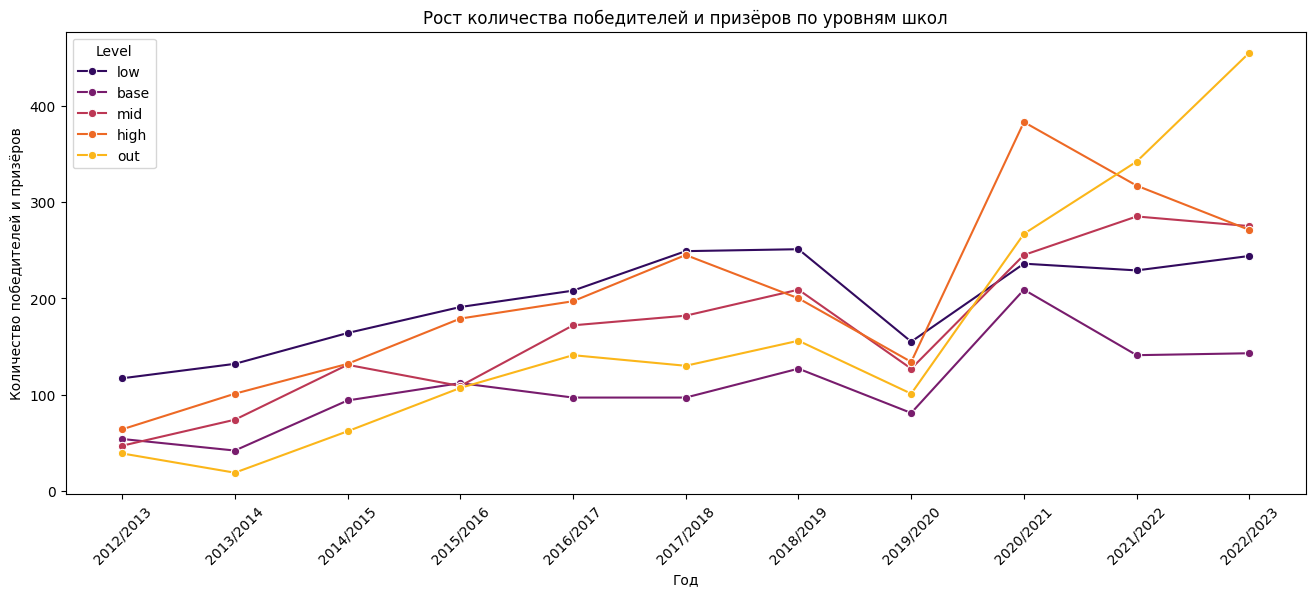

In [42]:
pl.figure(figsize=(16,6))
sns.lineplot(data=rpo4_grouped.groupby(['Year', 'Level'])['WinPrize'].sum().reset_index(), 
             x="Year", y="WinPrize", hue='Level', palette="inferno", style='Level', markers='o', dashes=False)
pl.xticks(rotation=45) 
pl.xlabel('Год')
pl.ylabel('Количество победителей и призёров')


pl.title('Рост количества победителей и призёров по уровням школ')


In [43]:
rpo4_gr_year_lvl = rpo4_grouped.reset_index().groupby(['Year', 'Level'], observed=False)['UniqueName'].agg(np.array).reset_index()
# rpo4_gr_year_lvl

In [44]:
rpo4_gr_year_lvl['NextYear'] = rpo4_gr_year_lvl['UniqueName'].shift(periods=-rpo4_gr_year_lvl['Level'].nunique())
# rpo4_gr_year_lvl

In [45]:
rpo4_gr_year_lvl = rpo4_gr_year_lvl[rpo4_gr_year_lvl['Year'] != '2022/2023']
# rpo4_gr_year_lvl
rpo4_gr_year_lvl['Retention'] = rpo4_gr_year_lvl.apply(lambda x: len(x['UniqueName'][np.isin(x['UniqueName'], x['NextYear'])]) / len(x['UniqueName']) * 100, axis=1)
# rpo4_gr_year_lvl

In [46]:
rpo4_gr_year_lvl.groupby('Level')['Retention'].mean()

C:\Users\i9629\AppData\Local\Temp\ipykernel_16648\3123079880.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rpo4_gr_year_lvl.groupby('Level')['Retention'].mean()


Level
low     45.959117
base    33.746986
mid     54.535117
high    65.936508
out     66.666667
Name: Retention, dtype: float64

C:\Users\i9629\AppData\Local\Temp\ipykernel_16648\4213819079.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sns.heatmap(pd.pivot_table(data=rpo4_gr_year_lvl, index='Level', columns='Year', values='Retention'), annot=True, fmt=".0f")


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0.5, 0, '2012/2013'),
  Text(1.5, 0, '2013/2014'),
  Text(2.5, 0, '2014/2015'),
  Text(3.5, 0, '2015/2016'),
  Text(4.5, 0, '2016/2017'),
  Text(5.5, 0, '2017/2018'),
  Text(6.5, 0, '2018/2019'),
  Text(7.5, 0, '2019/2020'),
  Text(8.5, 0, '2020/2021'),
  Text(9.5, 0, '2021/2022')])

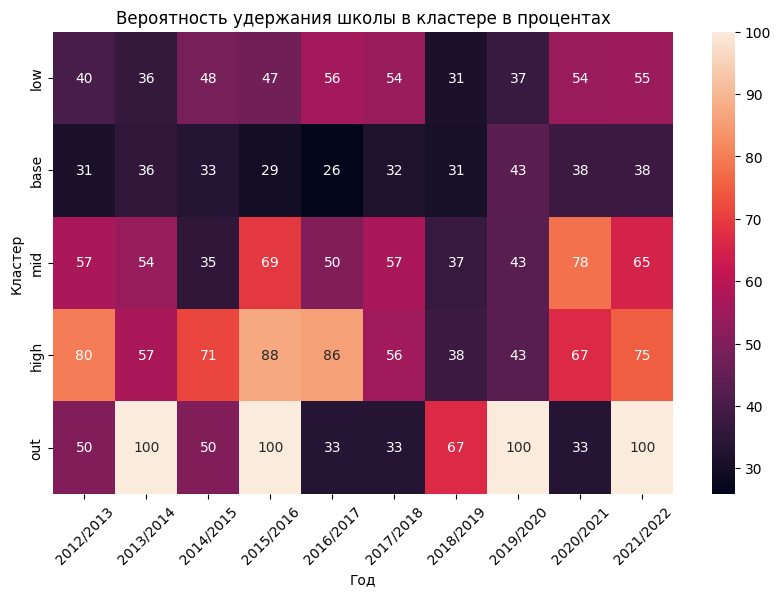

In [47]:
pl.figure(figsize=(10, 6))
sns.heatmap(pd.pivot_table(data=rpo4_gr_year_lvl, index='Level', columns='Year', values='Retention'), annot=True, fmt=".0f")
pl.title('Вероятность удержания школы в кластере в процентах')
pl.xlabel('Год')
pl.ylabel('Кластер')
pl.xticks(rotation=45)


In [48]:
rpo4_gr_year_lvl['NextYearLowDown'] = rpo4_gr_year_lvl.groupby('Year')['NextYear'].shift(1, fill_value=[-1])
rpo4_gr_year_lvl['NextYearTopUp'] = rpo4_gr_year_lvl.groupby('Year')['NextYear'].shift(-1, fill_value=[-1])
rpo4_gr_year_lvl['RetentionLowDown'] = rpo4_gr_year_lvl.apply(lambda x: len(x['UniqueName'][np.isin(x['UniqueName'], x['NextYearLowDown'])]) / len(x['UniqueName']) * 100, axis=1)
rpo4_gr_year_lvl['RetentionTopUp'] = rpo4_gr_year_lvl.apply(lambda x: len(x['UniqueName'][np.isin(x['UniqueName'], x['NextYearTopUp'])]) / len(x['UniqueName']) * 100, axis=1)
rpo4_gr_year_lvl.head()


,Year,Level,UniqueName,NextYear,Retention,NextYearLowDown,NextYearTopUp,RetentionLowDown,RetentionTopUp
0,2012/2013,low,"[1000, 1043, 109, 1120, 1158, 1189, 1199, 1216...","[1120, 1150, 1189, 1215, 1216, 1220, 1231, 123...",40.206186,[-1],"[1000, 1249, 1253, 1277, 1290, 1308, 1500, 150...",0.0,5.154639
1,2012/2013,base,"[1212, 1253, 1286, 1338, 1502, 1527, 1552, 156...","[1000, 1249, 1253, 1277, 1290, 1308, 1500, 150...",31.250000,"[1120, 1150, 1189, 1215, 1216, 1220, 1231, 123...","[1199, 1251, 1252, 1329, 1514, 1518, 1555, 170...",37.5,18.750000
2,2012/2013,mid,"[1251, 1513, 1514, 1518, 1555, 218, Вторая школа]","[1199, 1251, 1252, 1329, 1514, 1518, 1555, 170...",57.142857,"[1000, 1249, 1253, 1277, 1290, 1308, 1500, 150...","[1303, 1535, 1543, 179, 218, 57, Вторая школа]",0.0,28.571429
3,2012/2013,high,"[1303, 1543, 179, 57, ГБОУ школа «Интеллектуал»]","[1303, 1535, 1543, 179, 218, 57, Вторая школа]",80.000000,"[1199, 1251, 1252, 1329, 1514, 1518, 1555, 170...",[СУНЦ МГУ],20.0,0.000000
4,2012/2013,out,"[1535, СУНЦ МГУ]",[СУНЦ МГУ],50.000000,"[1303, 1535, 1543, 179, 218, 57, Вторая школа]",[-1],50.0,0.000000


In [49]:
rpo4_gr_year_lvl['LevelTopUp'] = rpo4_gr_year_lvl.groupby('Year')['Level'].shift(-1, fill_value=np.nan)
rpo4_gr_year_lvl['LevelLowDown'] = rpo4_gr_year_lvl.groupby('Year')['Level'].shift(1, fill_value=np.nan)
rpo4_gr_year_lvl['FollowLevel'] = list(rpo4_gr_year_lvl[['LevelLowDown', 'Level', 'LevelTopUp']].values)
rpo4_gr_year_lvl.head()

,Year,Level,UniqueName,NextYear,Retention,NextYearLowDown,NextYearTopUp,RetentionLowDown,RetentionTopUp,LevelTopUp,LevelLowDown,FollowLevel
0,2012/2013,low,"[1000, 1043, 109, 1120, 1158, 1189, 1199, 1216...","[1120, 1150, 1189, 1215, 1216, 1220, 1231, 123...",40.206186,[-1],"[1000, 1249, 1253, 1277, 1290, 1308, 1500, 150...",0.0,5.154639,base,NaN,"[nan, low, base]"
1,2012/2013,base,"[1212, 1253, 1286, 1338, 1502, 1527, 1552, 156...","[1000, 1249, 1253, 1277, 1290, 1308, 1500, 150...",31.250000,"[1120, 1150, 1189, 1215, 1216, 1220, 1231, 123...","[1199, 1251, 1252, 1329, 1514, 1518, 1555, 170...",37.5,18.750000,mid,low,"[low, base, mid]"
2,2012/2013,mid,"[1251, 1513, 1514, 1518, 1555, 218, Вторая школа]","[1199, 1251, 1252, 1329, 1514, 1518, 1555, 170...",57.142857,"[1000, 1249, 1253, 1277, 1290, 1308, 1500, 150...","[1303, 1535, 1543, 179, 218, 57, Вторая школа]",0.0,28.571429,high,base,"[base, mid, high]"
3,2012/2013,high,"[1303, 1543, 179, 57, ГБОУ школа «Интеллектуал»]","[1303, 1535, 1543, 179, 218, 57, Вторая школа]",80.000000,"[1199, 1251, 1252, 1329, 1514, 1518, 1555, 170...",[СУНЦ МГУ],20.0,0.000000,out,mid,"[mid, high, out]"
4,2012/2013,out,"[1535, СУНЦ МГУ]",[СУНЦ МГУ],50.000000,"[1303, 1535, 1543, 179, 218, 57, Вторая школа]",[-1],50.0,0.000000,NaN,high,"[high, out, nan]"


In [50]:
rpo4_gr_year_lvl['TotalRetention'] = list(rpo4_gr_year_lvl[['RetentionLowDown', 'Retention', 'RetentionTopUp']].values.round(2))
rpo4_gr_year_lvl = rpo4_gr_year_lvl.explode(['TotalRetention', 'FollowLevel'])
rpo4_gr_year_lvl

,Year,Level,UniqueName,NextYear,Retention,NextYearLowDown,NextYearTopUp,RetentionLowDown,RetentionTopUp,LevelTopUp,LevelLowDown,FollowLevel,TotalRetention
0,2012/2013,low,"[1000, 1043, 109, 1120, 1158, 1189, 1199, 1216...","[1120, 1150, 1189, 1215, 1216, 1220, 1231, 123...",40.206186,[-1],"[1000, 1249, 1253, 1277, 1290, 1308, 1500, 150...",0.0,5.154639,base,NaN,NaN,0.0
0,2012/2013,low,"[1000, 1043, 109, 1120, 1158, 1189, 1199, 1216...","[1120, 1150, 1189, 1215, 1216, 1220, 1231, 123...",40.206186,[-1],"[1000, 1249, 1253, 1277, 1290, 1308, 1500, 150...",0.0,5.154639,base,NaN,low,40.21
0,2012/2013,low,"[1000, 1043, 109, 1120, 1158, 1189, 1199, 1216...","[1120, 1150, 1189, 1215, 1216, 1220, 1231, 123...",40.206186,[-1],"[1000, 1249, 1253, 1277, 1290, 1308, 1500, 150...",0.0,5.154639,base,NaN,base,5.15
1,2012/2013,base,"[1212, 1253, 1286, 1338, 1502, 1527, 1552, 156...","[1000, 1249, 1253, 1277, 1290, 1308, 1500, 150...",31.250000,"[1120, 1150, 1189, 1215, 1216, 1220, 1231, 123...","[1199, 1251, 1252, 1329, 1514, 1518, 1555, 170...",37.5,18.750000,mid,low,low,37.5
1,2012/2013,base,"[1212, 1253, 1286, 1338, 1502, 1527, 1552, 156...","[1000, 1249, 1253, 1277, 1290, 1308, 1500, 150...",31.250000,"[1120, 1150, 1189, 1215, 1216, 1220, 1231, 123...","[1199, 1251, 1252, 1329, 1514, 1518, 1555, 170...",37.5,18.750000,mid,low,base,31.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,2021/2022,high,"[1252, 1535, 1543, 179, СУНЦ МГУ, лицей ВШЭ, л...","[1535, 179, ГБПОУ «Воробьевы горы», СУНЦ МГУ, ...",75.000000,"[1000, 1252, 1329, 1448, 1449, 1504, 1541, 154...","[57, Вторая школа, ЦПМ]",25.0,0.000000,out,mid,high,75.0
48,2021/2022,high,"[1252, 1535, 1543, 179, СУНЦ МГУ, лицей ВШЭ, л...","[1535, 179, ГБПОУ «Воробьевы горы», СУНЦ МГУ, ...",75.000000,"[1000, 1252, 1329, 1448, 1449, 1504, 1541, 154...","[57, Вторая школа, ЦПМ]",25.0,0.000000,out,mid,out,0.0
49,2021/2022,out,"[57, Вторая школа, ЦПМ]","[57, Вторая школа, ЦПМ]",100.000000,"[1535, 179, ГБПОУ «Воробьевы горы», СУНЦ МГУ, ...",[-1],0.0,0.000000,NaN,high,high,0.0
49,2021/2022,out,"[57, Вторая школа, ЦПМ]","[57, Вторая школа, ЦПМ]",100.000000,"[1535, 179, ГБПОУ «Воробьевы горы», СУНЦ МГУ, ...",[-1],0.0,0.000000,NaN,high,out,100.0


In [51]:
def sev_order(x:pd.Series):
    return x.replace({'low': 0, 'base': 1, 'mid': 2, 'high': 3, 'out': 4})
    

In [52]:
# rpo4_gr_year_lvl = rpo4_gr_year_lvl.sort_values(['Level', 'FollowLevel'], key=lambda x: sev_order(x), )
# rpo4_gr_year_lvl['LvlChange'] = rpo4_gr_year_lvl['Level'].astype(str) + ' -> ' + rpo4_gr_year_lvl['FollowLevel'].astype(str)
# ret_pivot = pd.pivot_table(data=rpo4_gr_year_lvl, index='LvlChange', columns='Year', values='TotalRetention')


ret_pivot = pd.pivot_table(data=rpo4_gr_year_lvl, index=['Level', 'FollowLevel'], columns='Year', values='TotalRetention').sort_values(['Level', 'FollowLevel'], key=lambda x: sev_order(x)).reset_index()
ret_pivot['LvlChange'] = ret_pivot['Level'].astype(str) + ' -> ' + ret_pivot['FollowLevel'].astype(str)
ret_pivot

C:\Users\i9629\AppData\Local\Temp\ipykernel_16648\993707624.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  ret_pivot = pd.pivot_table(data=rpo4_gr_year_lvl, index=['Level', 'FollowLevel'], columns='Year', values='TotalRetention').sort_values(['Level', 'FollowLevel'], key=lambda x: sev_order(x)).reset_index()
C:\Users\i9629\AppData\Local\Temp\ipykernel_16648\655224132.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return x.replace({'low': 0, 'base': 1, 'mid': 2, 'high': 3, 'out': 4})
C:\Users\i9629\AppData\Local\Temp\ipykernel_16648\655224132.py:2: FutureWarning: The behavior of Series.re

Year,Level,FollowLevel,2012/2013,2013/2014,2014/2015,2015/2016,2016/2017,2017/2018,2018/2019,2019/2020,2020/2021,2021/2022,LvlChange
0,low,low,40.21,36.11,48.44,47.1,56.25,54.17,31.36,36.97,54.39,54.6,low -> low
1,low,base,5.15,10.19,10.16,4.52,5.62,7.14,5.33,10.08,7.02,4.29,low -> base
2,base,low,37.5,35.71,37.04,47.06,44.44,45.45,42.31,26.09,29.73,41.38,base -> low
3,base,base,31.25,35.71,33.33,29.41,25.93,31.82,30.77,43.48,37.84,37.93,base -> base
4,base,mid,18.75,14.29,11.11,17.65,18.52,9.09,0.0,13.04,21.62,10.34,base -> mid
5,mid,base,0.0,23.08,29.41,15.38,9.09,28.57,15.79,14.29,16.67,21.74,mid -> base
6,mid,mid,57.14,53.85,35.29,69.23,50.0,57.14,36.84,42.86,77.78,65.22,mid -> mid
7,mid,high,28.57,15.38,5.88,0.0,4.55,4.76,5.26,28.57,0.0,4.35,mid -> high
8,high,mid,20.0,28.57,0.0,12.5,0.0,22.22,62.5,28.57,11.11,25.0,high -> mid
9,high,high,80.0,57.14,71.43,87.5,85.71,55.56,37.5,42.86,66.67,75.0,high -> high


In [53]:
ret_pivot = ret_pivot.set_index('LvlChange').drop(['Level', 'FollowLevel'], axis=1).astype(np.float64)
# pd.pivot_table(data=ret_pivot.drop(['Level', 'FollowLevel'], axis=1), index='LvlChange').astype(np.float64).info()
ret_pivot

Year,2012/2013,2013/2014,2014/2015,2015/2016,2016/2017,2017/2018,2018/2019,2019/2020,2020/2021,2021/2022
LvlChange,,,,,,,,,,
low -> low,40.21,36.11,48.44,47.10,56.25,54.17,31.36,36.97,54.39,54.60
low -> base,5.15,10.19,10.16,4.52,5.62,7.14,5.33,10.08,7.02,4.29
base -> low,37.50,35.71,37.04,47.06,44.44,45.45,42.31,26.09,29.73,41.38
base -> base,31.25,35.71,33.33,29.41,25.93,31.82,30.77,43.48,37.84,37.93
base -> mid,18.75,14.29,11.11,17.65,18.52,9.09,0.00,13.04,21.62,10.34
mid -> base,0.00,23.08,29.41,15.38,9.09,28.57,15.79,14.29,16.67,21.74
mid -> mid,57.14,53.85,35.29,69.23,50.00,57.14,36.84,42.86,77.78,65.22
mid -> high,28.57,15.38,5.88,0.00,4.55,4.76,5.26,28.57,0.00,4.35
high -> mid,20.00,28.57,0.00,12.50,0.00,22.22,62.50,28.57,11.11,25.00


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0.5, 0, '2012/2013'),
  Text(1.5, 0, '2013/2014'),
  Text(2.5, 0, '2014/2015'),
  Text(3.5, 0, '2015/2016'),
  Text(4.5, 0, '2016/2017'),
  Text(5.5, 0, '2017/2018'),
  Text(6.5, 0, '2018/2019'),
  Text(7.5, 0, '2019/2020'),
  Text(8.5, 0, '2020/2021'),
  Text(9.5, 0, '2021/2022')])

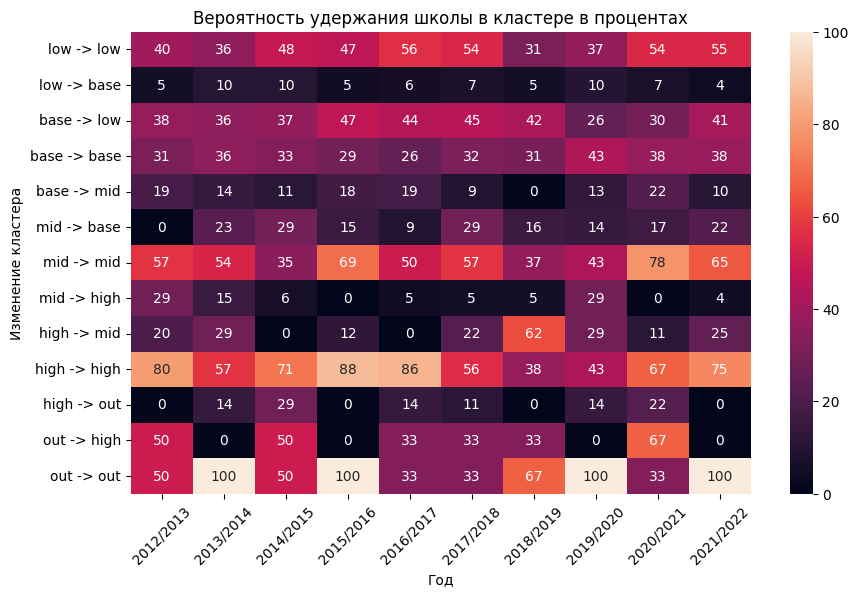

In [54]:
pl.figure(figsize=(10, 6))
sns.heatmap(ret_pivot, annot=True, fmt=".0f")

pl.title('Вероятность удержания школы в кластере в процентах')
pl.xlabel('Год')
pl.ylabel('Изменение кластера')
pl.xticks(rotation=45)